In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data/data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x = df.drop(columns=['math_score'], axis = 1)
y = df['math_score']

# len(x), len(y)
x.shape, y.shape

((1000, 7), (1000,))

In [6]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [8]:
# create columns transformers with 2 types of transformers

num_features = x.select_dtypes(exclude="object").columns 
cat_features = x.select_dtypes(include = 'object').columns

In [9]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [10]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 

numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
    ('OneHotEncoder', cat_transformer, cat_features),
    ('StandardScaler', numeric_transformer, num_features),
    ]
) 

In [13]:
from sklearn.model_selection import train_test_split

X = preprocessor.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

#### Creating an evaluating function to measure our model performance...

In [14]:
def eval(y_true, y_pred):
    '''
    y_true : Actual target value of the dataset.
    y_pred : The predicted target value of the dataset.
    '''
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2_square = r2_score(y_true, y_pred)

    return mae, mse, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = eval(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = eval(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3540
- Mean Absolute Error: 4.2469
- R2 Score: 0.8795
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3722
- Mean Absolute Error: 4.3075
- R2 Score: 0.8531


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5481
- Mean Absolute Error: 5.1617
- R2 Score: 0.8198
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9097
- Mean Absolute Error: 4.7133
- R2 Score: 0.8223


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3317
- Mean Absolute Error: 4.2429
- R2 Score: 0.8805
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3527
- Mean Absolute Error: 4.2862
- R2 Score: 0.8542


K-Neighbors regressor
Model performance for Training set
- Root Mean Squared Error: 5.9681
- Mean Absolute Error: 4.7058
- R2 Score: 0.8503
-----------------------

##### Creating a DataFrame of the model performances

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
2,Ridge,0.854184
0,Linear Regression,0.853119
7,CatBoost Regressor,0.843504
5,Random Forest Regressor,0.830448
1,Lasso,0.822257
8,AdaBoost Regressor,0.820107
6,XGBoost Regressor,0.806310
3,K-Neighbors regressor,0.793049
4,Decision Tree Regressor,0.695303


In [18]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.42


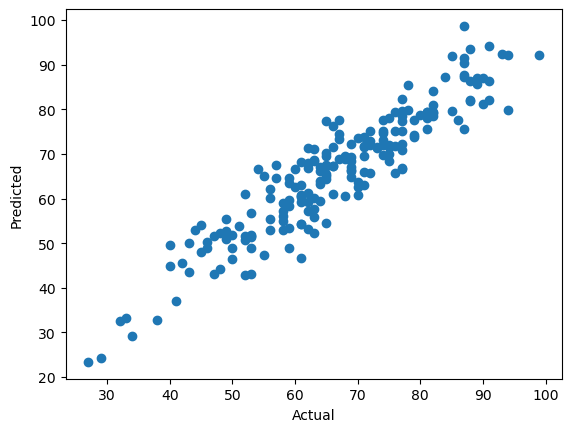

In [19]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

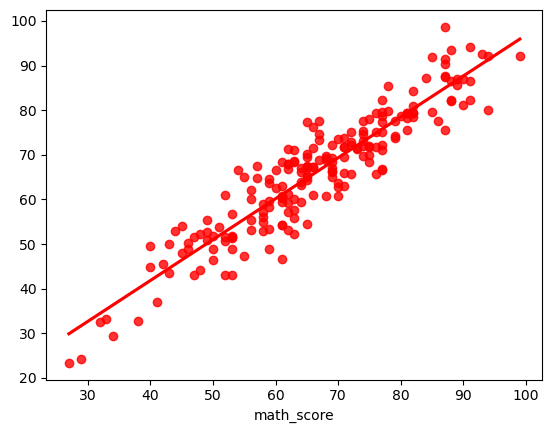

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
545,78,85.431744,-7.431744
298,40,49.669779,-9.669779
109,70,63.659818,6.340182
837,75,68.402034,6.597966
194,69,72.299240,-3.299240
...,...,...,...
68,61,60.806535,0.193465
449,81,79.350186,1.649814
715,76,75.153882,0.846118
793,89,86.897022,2.102978
